### Import & function

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/ThiCK/Allurez/Bai nop'

/content/drive/.shortcut-targets-by-id/10ha7m2j901MUJvlvpV2uYbTWXko6nCNg/ThiCK/Allurez/Bai nop


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def missing_handling(data, variable, type=''):
    if type == 'mean':
        mean = data[variable].mean()
        data[variable] = data[variable].fillna(mean)

    elif type == 'median':
        median = data[variable].median()
        data[variable] = data[variable].fillna(median)

    elif type == 'mode':
        mode = data[variable].mode()[0]
        data[variable] = data[variable].fillna(mode)

    elif type == 'random':
        random_sample_train = data[variable].dropna().sample(data[variable].isnull().sum(), random_state=42)
        random_sample_train.index = data[data[variable].isnull()].index
        data.loc[data[variable].isnull(), variable] = random_sample_train

    elif type == 'end_of_dist':
        value = int(data[variable].mean() + 3 * data[variable].std())
        data[variable] = data[variable].fillna(value)

    elif type == 'arbitrary':
        data[variable] = data[variable].fillna(5)

    else:
        pass

    return data

def outlier_handling(data, variable, mode='', dist='gaussian'):
    if mode == 'extreme':
        alpha = 3
    else:
        alpha = 1.5
        
    if dist=='gaussian':
        uppper_boundary=data[variable].mean()+alpha*data[variable].std()
        lower_boundary=data[variable].mean()-alpha*data[variable].std()

        data.loc[data[variable]>uppper_boundary,variable]=uppper_boundary
        if lower_boundary>0:
            data.loc[data[variable]<lower_boundary,variable]=lower_boundary

    elif dist=='skewed':
        IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
        upper_bridge = data[variable].quantile(0.75) + (IQR * alpha)
        lower_bridge = data[variable].quantile(0.25) - (IQR * alpha)

        data.loc[data[variable]>upper_bridge,variable]=upper_bridge
        if lower_bridge>0:
            data.loc[data[variable]<lower_bridge,variable]=lower_bridge

    else:
        pass
    return data

# Overview

* Shape: Hình dáng của viên kim cương
* Carat: trọng lượng kim cương
* Color: Màu sắc của viên kim cương
* Clarity: Độ trong của viên kim cương
* Grade by: Đơn vị chứng nhận cho viên kim cương
* Cut grade: Lớp cắt của viên kim cương
* Fluorescence: Sự phát quang của viên kim cương khi gặp tia cực tím
* Culet: cạnh phẳng nhỏ nhất ở dưới cùng của viên kim cương để bảo vệ phần dưới của viên kim cương
* Depth: được đo từ culet ở dưới cùng đến mặt bàn lớn ở trên cùng chia cho chiều rộng của viên kim cương
* Table: mặt phẳng lớn trên đỉnh của một viên kim cương
* Girdle: đề cập đến cạnh ngoài, hoặc đường viền, hình dạng của viên kim cương
* Polish: mức độ hoàn thiện của việc đánh bóng
* Symmetry: tính đối xứng của viên kim cương
* Measurements: độ dài, độ rộng và độ sâu của viên kim cương (mm)

In [ ]:
data = pd.read_csv("./Clean_Data/data_small.csv")

In [ ]:
data.shape

(1033, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style Number  1033 non-null   object 
 1   Shape         1033 non-null   object 
 2   Carat Weight  1033 non-null   float64
 3   Color         1033 non-null   object 
 4   Clarity       1033 non-null   object 
 5   Graded By     1033 non-null   object 
 6   Cut Grade     1033 non-null   object 
 7   Fluorescence  1017 non-null   object 
 8   Culet         325 non-null    object 
 9   Depth         1019 non-null   float64
 10  Table         1019 non-null   float64
 11  Girdle        895 non-null    object 
 12  Polish        1033 non-null   object 
 13  Symmetry      1033 non-null   object 
 14  Measurements  1032 non-null   object 
 15  Price         1033 non-null   int64  
dtypes: float64(3), int64(1), object(12)
memory usage: 129.2+ KB


In [ ]:
data.head()

,Style Number,Shape,Carat Weight,Color,Clarity,Graded By,Cut Grade,Fluorescence,Culet,Depth,Table,Girdle,Polish,Symmetry,Measurements,Price
0,BN46-2_13198,Round,1.01,H,VVS2,GIA,Excellent,Faint,NaN,61.2,61.0,Medium to Slightly Thick,Excellent,Excellent,6.43 x 6.47 x 3.95 mm,13537
1,U752-63_220,Round,1.40,D,VS2,GIA,Excellent,None,None,62.4,58.0,Medium to Slightly Thick,Excellent,Excellent,7.13 x 7.16 x 4.46 mm,27126
2,BHEM-357_105955,Round,2.12,K,VVS1,GIA,Excellent,Medium,NaN,61.0,62.0,Medium to Slightly Thick,Excellent,Excellent,8.20 x 8.26 x 5.02 mm,27090
3,H3399_1159,Round,0.30,I,I1,IGI,Excellent,None,None,60.4,60.5,NaN,Excellent,Excellent,4.31 x 4.34 x 2.61 mm,435
4,2007_75570,Round,0.56,G,VS2,GIA,Excellent,Strong,NaN,62.2,57.0,Medium to Slightly Thick,Excellent,Excellent,5.23 x 5.27 x 3.26 mm,3075


**Rename Depth, Carat Weight, Cut Grade column**

In [ ]:
data.rename(columns = {'Depth':'%Depth'}, inplace = True)
data.rename(columns = {'Carat Weight':'Carat'}, inplace = True)
data.rename(columns = {'Cut Grade':'Cut'}, inplace = True)

**Seperate Measurements into Length, Width, Depth** 

In [ ]:
data[['Length', 'Width', 'Depth']] = data['Measurements'].str.split('x', expand=True)
data['Depth'] = data['Depth'].str.replace(' mm', '')
data[['Length', 'Width', 'Depth']] = data[['Length', 'Width', 'Depth']].astype(float)
data.drop(['Measurements'],inplace = True, axis = 1)

**Drop Style Number & Graded By column**

In [ ]:
data.drop(['Style Number'],inplace = True, axis = 1)
data.drop(['Graded By'],inplace = True, axis = 1)

**Drop Girdle column**

* Vì Girdle không quan trọng trong việc ảnh hưởng đến giá kim cương 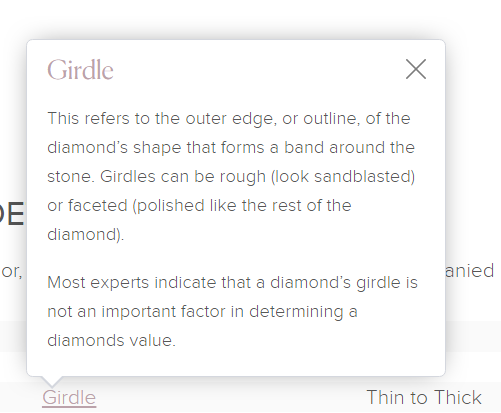

In [ ]:
data.drop(['Girdle'],inplace = True, axis = 1)
data.head()

,Shape,Carat,Color,Clarity,Cut,Fluorescence,Culet,%Depth,Table,Polish,Symmetry,Price,Length,Width,Depth
0,Round,1.01,H,VVS2,Excellent,Faint,NaN,61.2,61.0,Excellent,Excellent,13537,6.43,6.47,3.95
1,Round,1.40,D,VS2,Excellent,None,None,62.4,58.0,Excellent,Excellent,27126,7.13,7.16,4.46
2,Round,2.12,K,VVS1,Excellent,Medium,NaN,61.0,62.0,Excellent,Excellent,27090,8.20,8.26,5.02
3,Round,0.30,I,I1,Excellent,None,None,60.4,60.5,Excellent,Excellent,435,4.31,4.34,2.61
4,Round,0.56,G,VS2,Excellent,Strong,NaN,62.2,57.0,Excellent,Excellent,3075,5.23,5.27,3.26


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shape         1033 non-null   object 
 1   Carat         1033 non-null   float64
 2   Color         1033 non-null   object 
 3   Clarity       1033 non-null   object 
 4   Cut           1033 non-null   object 
 5   Fluorescence  1017 non-null   object 
 6   Culet         325 non-null    object 
 7   %Depth        1019 non-null   float64
 8   Table         1019 non-null   float64
 9   Polish        1033 non-null   object 
 10  Symmetry      1033 non-null   object 
 11  Price         1033 non-null   int64  
 12  Length        1032 non-null   float64
 13  Width         1032 non-null   float64
 14  Depth         1032 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 121.2+ KB


In [ ]:
data.describe()

,Carat,%Depth,Table,Price,Length,Width,Depth
count,1033.000000,1019.000000,1019.000000,1033.000000,1032.000000,1032.000000,1032.000000
mean,0.672662,65.095780,62.597517,4620.266215,5.889961,4.796085,3.107762
std,0.415003,5.804372,5.753799,20660.658896,1.548277,0.997222,0.627396
min,0.180000,37.200000,50.000000,356.000000,3.300000,3.030000,1.010000
25%,0.450000,61.300000,59.000000,1365.000000,4.960000,4.140000,2.630000
50%,0.540000,64.500000,61.000000,1966.000000,5.600000,4.550000,3.060000
75%,0.800000,68.600000,66.000000,3325.000000,6.362500,5.325000,3.530000
max,5.670000,90.900000,88.000000,622289.000000,19.240000,9.230000,5.570000


# EDA

## Categories

### Xử lí missing value

In [ ]:
data.select_dtypes(include='object').isnull().sum()

Shape             0
Color             0
Clarity           0
Cut               0
Fluorescence     16
Culet           708
Polish            0
Symmetry          0
dtype: int64

**Fluorescence**

In [ ]:
# thay thế các giá trị bị thiếu của Fluorescence bằng mode
mode = data.Fluorescence.mode()[0]
data.Fluorescence = data.Fluorescence.fillna(mode)

**Culet có số missing value lớn hơn 70%, vì vậy ta sẽ bỏ cột này**

In [ ]:
# drop Culet
data.drop(['Culet'], inplace = True, axis = 1)

In [ ]:
data.select_dtypes(include='object').isnull().sum()

Shape           0
Color           0
Clarity         0
Cut             0
Fluorescence    0
Polish          0
Symmetry        0
dtype: int64

### Explore

#### Shape & Price

<Axes: xlabel='Shape', ylabel='Price'>

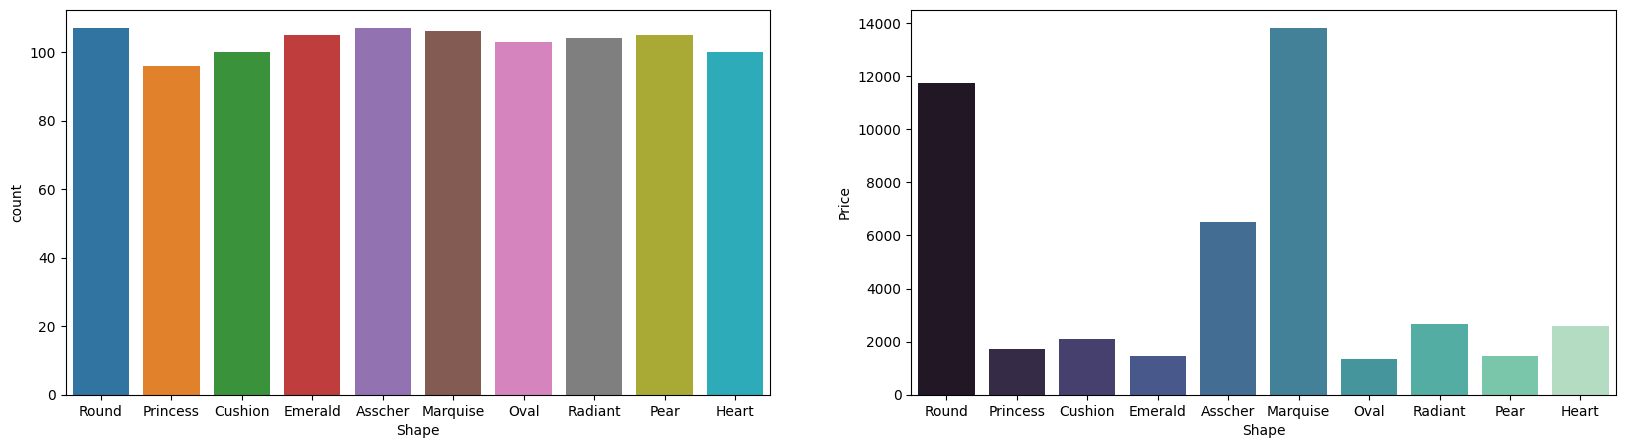

In [ ]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 5))
sns.countplot(data=data, x = 'Shape', ax=ax[0])
sns.barplot(data=data, x='Shape', y='Price', palette='mako', ax=ax[1], errorbar=None)

+ Shape có các loại khá đồng đều về số lượng, ngoại trừ 'Marquise' có số lượng ít nhất và 'Round' có số lượng nhiều nhất
+ 'Round' và 'Marquise' có giá trung bình cao nhất

#### Cut & Price

<Axes: xlabel='Cut', ylabel='count'>

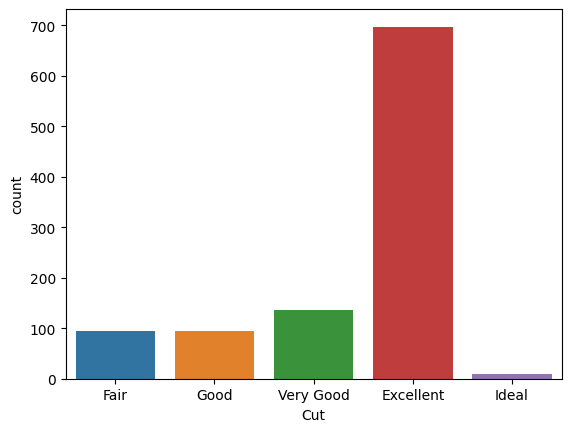

In [ ]:
cut_dtype = pd.api.types.CategoricalDtype(
    categories=['Fair', 'Good', 'Very Good', 'Excellent', 'Ideal'], 
    ordered=True)
data['Cut'] = data['Cut'].astype(cut_dtype)

sns.countplot(data=data, x = 'Cut')

+ Đa số là 'Excellent', 'Ideal' xuất hiện rất ít.
+ -> Gộp 'Excellent' với 'Ideal'

In [ ]:
data['Cut'] = data['Cut'].replace(['Excellent', 'Ideal'], 'Excellent_Ideal')

<Axes: xlabel='Cut', ylabel='Price'>

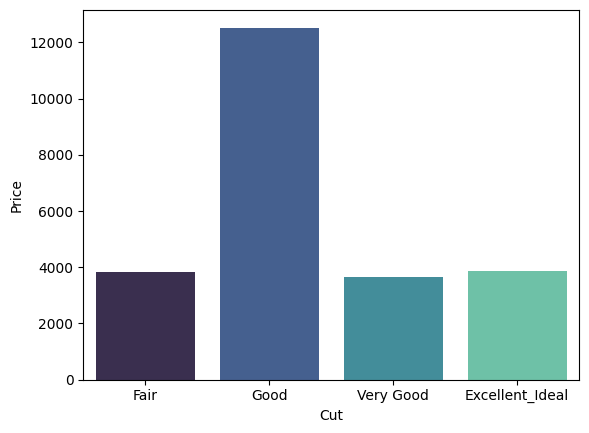

In [ ]:
cut_dtype = pd.api.types.CategoricalDtype(
    categories=['Fair', 'Good', 'Very Good', 'Excellent_Ideal'], 
    ordered=True)
data['Cut'] = data['Cut'].astype(cut_dtype)
sns.barplot(data=data, x='Cut', y='Price', palette='mako', errorbar=None)

+ 'Good' tuy xuất hiện ít hơn và chất lượng thấp hơn nhưng có giá trung bình cao hơn 'Excellent_Ideal'

#### Color & Price

<Axes: xlabel='Color', ylabel='Price'>

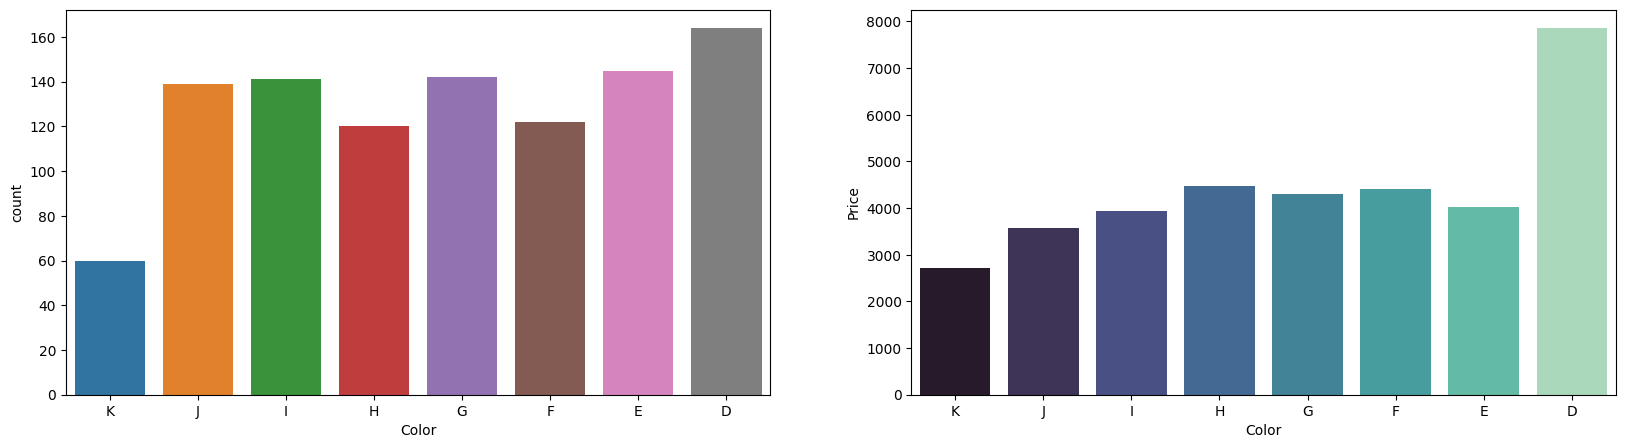

In [ ]:
color_dtype = pd.api.types.CategoricalDtype(
    categories=['K', 'J', 'I', 'H', 'G', 'F', 'E', 'D'], 
    ordered=True)
data['Color'] = data['Color'].astype(color_dtype)

figure, ax = plt.subplots(ncols=2, figsize=(20, 5))
sns.countplot(data=data, x = 'Color', ax=ax[0])
sns.barplot(data=data, x='Color', y='Price', palette='mako', ax=ax[1], errorbar=None)

+ Color có các loại khá đồng đều về số lượng, ngoại trừ 'K' có số lượng ít hơn
+ 'D' có giá trung bình cao nhất, 'K' có giá trung bình thấp nhất (màu kém nhất)

####Clarity & Price

<Axes: xlabel='Clarity', ylabel='count'>

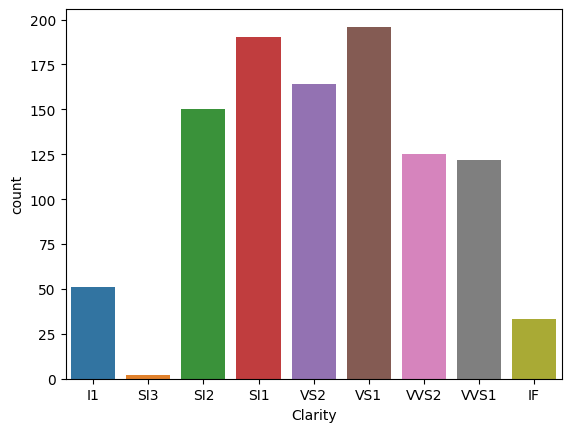

In [ ]:
clar_dtype = pd.api.types.CategoricalDtype(
    categories=['I1', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], 
    ordered=True)
data['Clarity'] = data['Clarity'].astype(clar_dtype)

# figure, ax = plt.subplots(ncols=2, figsize=(20, 5))
sns.countplot(data=data, x = 'Clarity')
# sns.barplot(data=data, x='Clarity', y='Price', palette='mako', ax=ax[1], errorbar=None)

+ 'I1', 'SI3' và 'IF' xuất hiện khá ít
+ -> Gộp 'I1' và 'SI3' thành loại 'I1_SI3'

In [ ]:
data['Clarity'] = data['Clarity'].replace(['SI3', 'I1'], 'I1_SI3')

<Axes: xlabel='Clarity', ylabel='Price'>

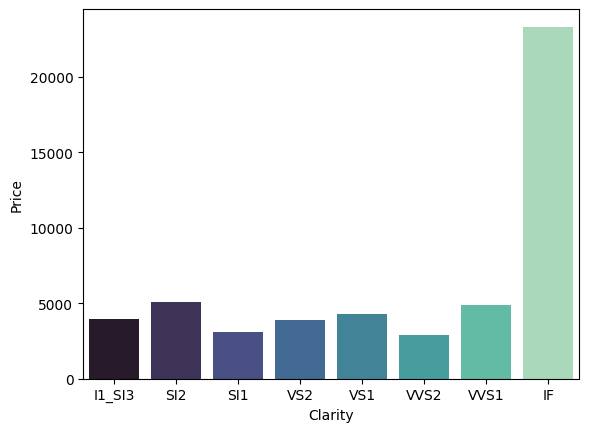

In [ ]:
clar_dtype = pd.api.types.CategoricalDtype(
    categories=['I1_SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], 
    ordered=True)
data['Clarity'] = data['Clarity'].astype(clar_dtype)

sns.barplot(data=data, x='Clarity', y='Price', palette='mako', errorbar=None)

+ 'IF' là loại đẹp nhất nên có giá trung bình cao hơn hẳn

#### Polish & Price

<Axes: xlabel='Polish', ylabel='count'>

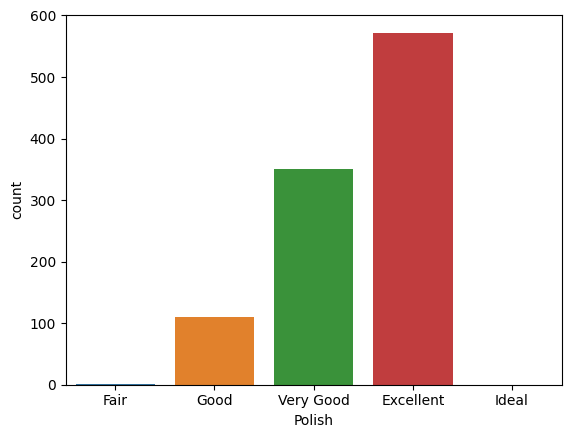

In [ ]:
clar_dtype = pd.api.types.CategoricalDtype(
    categories=['Fair', 'Good', 'Very Good', 'Excellent', 'Ideal'], 
    ordered=True)
data['Polish'] = data['Polish'].astype(clar_dtype)

sns.countplot(data=data, x = 'Polish')

+ Chủ yếu là 'Excellent', 'Good', 'Very Good', 'Fair' và 'Ideal' thì xuất hiện rất ít
+ -> Gộp Fair với Good, Excellent với Ideal

In [ ]:
data['Polish'] = data['Polish'].replace(['Excellent', 'Ideal'], 'Excellent_Ideal')
data['Polish'] = data['Polish'].replace(['Good', 'Fair'], 'Fair_Good')

<Axes: xlabel='Polish', ylabel='Price'>

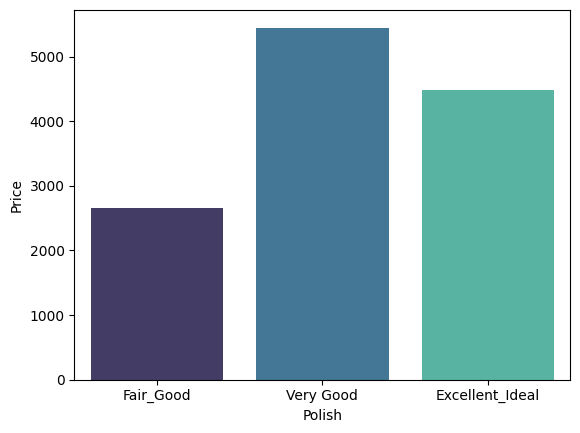

In [ ]:
clar_dtype = pd.api.types.CategoricalDtype(
    categories=['Fair_Good', 'Very Good', 'Excellent_Ideal'], 
    ordered=True)
data['Polish'] = data['Polish'].astype(clar_dtype)

sns.barplot(data=data, x='Polish', y='Price', palette='mako', errorbar=None)

+ 'Very Good' có giá trung bình cao hơn so với 2 loại còn lại

#### Symmetry & Price

<Axes: xlabel='Symmetry', ylabel='Price'>

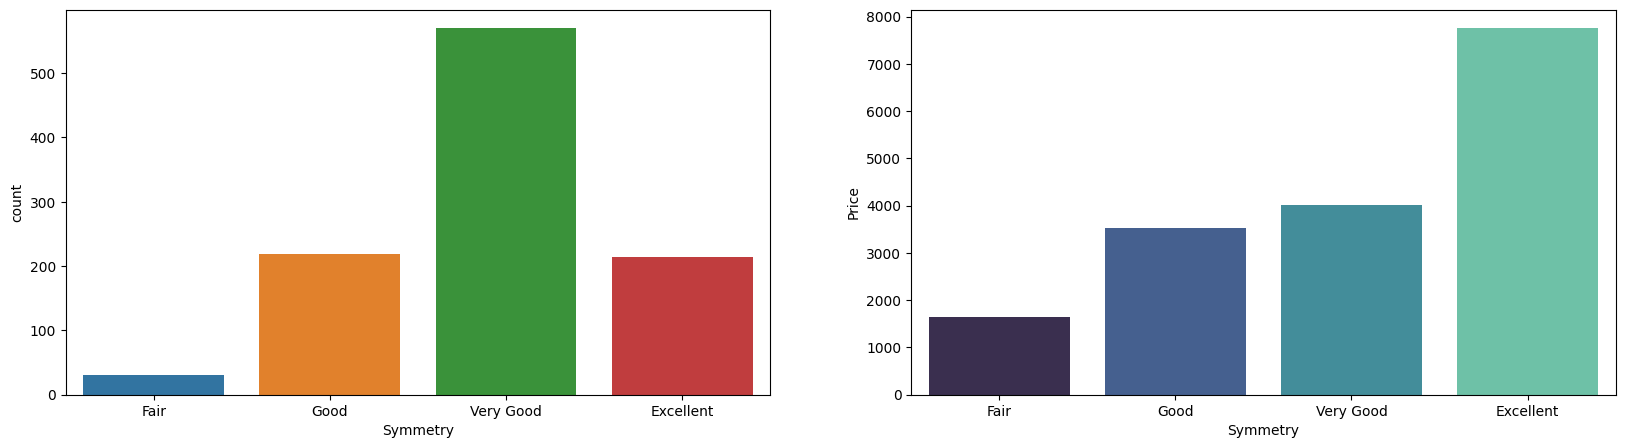

In [ ]:
clar_dtype = pd.api.types.CategoricalDtype(
    categories=['Fair', 'Good', 'Very Good', 'Excellent'], 
    ordered=True)
data['Symmetry'] = data['Symmetry'].astype(clar_dtype)

figure, ax = plt.subplots(ncols=2, figsize=(20, 5))
sns.countplot(data=data, x = 'Symmetry', ax=ax[0])
sns.barplot(data=data, x='Symmetry', y='Price', palette='mako', ax=ax[1], errorbar=None)

+ Tập trung khá nhiều ở 'Very Good', 'Fair' xuất hiện khá ít
+ Có thể thấy giá trung bình hầu như tăng dần theo chất lượng của Symmetry

#### Fluorescence & Price

<Axes: xlabel='Fluorescence', ylabel='count'>

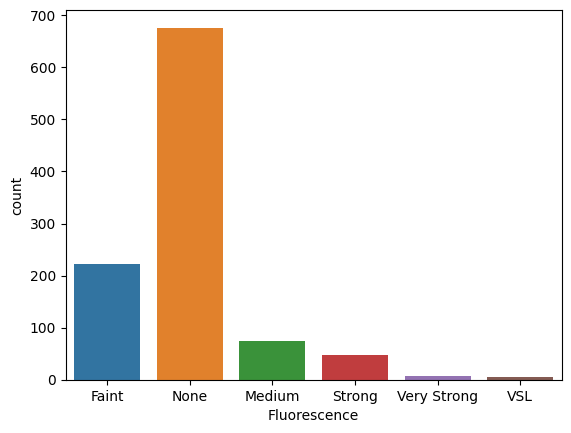

In [ ]:
sns.countplot(data=data, x = 'Fluorescence')

+ 'None' chiếm số lượng nhiều nhất
+ Phần lớn kim cương được chia thành 2 loại, loại có Fluorescence và loại không có
+ -> Gộp tất cả các loại khác 'None' vào thành 1 loại tên là Have_Fluorescence

In [ ]:
data['Fluorescence'] = data['Fluorescence'].replace(['Faint', 'Medium', 'Strong', 'STR', 'VSL', 'Very Strong', 'VSTG'], 
                                                    'Have_Fluorescence')

In [ ]:
data['Fluorescence'] = data['Fluorescence'].replace(['Strong', 'STR'], 'Strong')
data['Fluorescence'] = data['Fluorescence'].replace(['VSL', 'Very Strong', 'VSTG'], 
                                                    'Very Strong')

<Axes: xlabel='Fluorescence', ylabel='Price'>

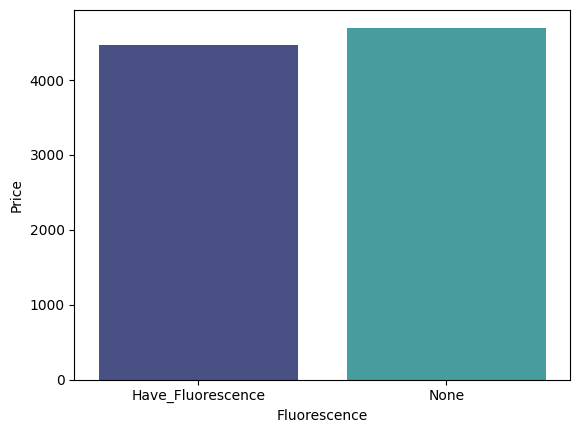

In [ ]:
sns.barplot(data=data, x='Fluorescence', y='Price', palette='mako', errorbar=None)

* Giá trung bình 'None' nhỉnh hơn so với 'Have_Fluorescence' khá ít

## Numerics

In [ ]:
data.select_dtypes(include='number').isnull().sum()

Carat      0
%Depth    14
Table     14
Price      0
Length     1
Width      1
Depth      1
dtype: int64

### Xử lí missing value

**%Depth, Table**

In [ ]:
# fill missing with median
data['%Depth'] = data['%Depth'].fillna(data['%Depth'].median())
data['Table'] = data['Table'].fillna(data['%Depth'].median())

**Length, Width, Depth**

In [ ]:
# drop missing value
data.dropna(inplace=True)

In [ ]:
data.select_dtypes(include='number').isnull().sum()

Carat     0
%Depth    0
Table     0
Price     0
Length    0
Width     0
Depth     0
dtype: int64

### Explore

#### Carat & Price

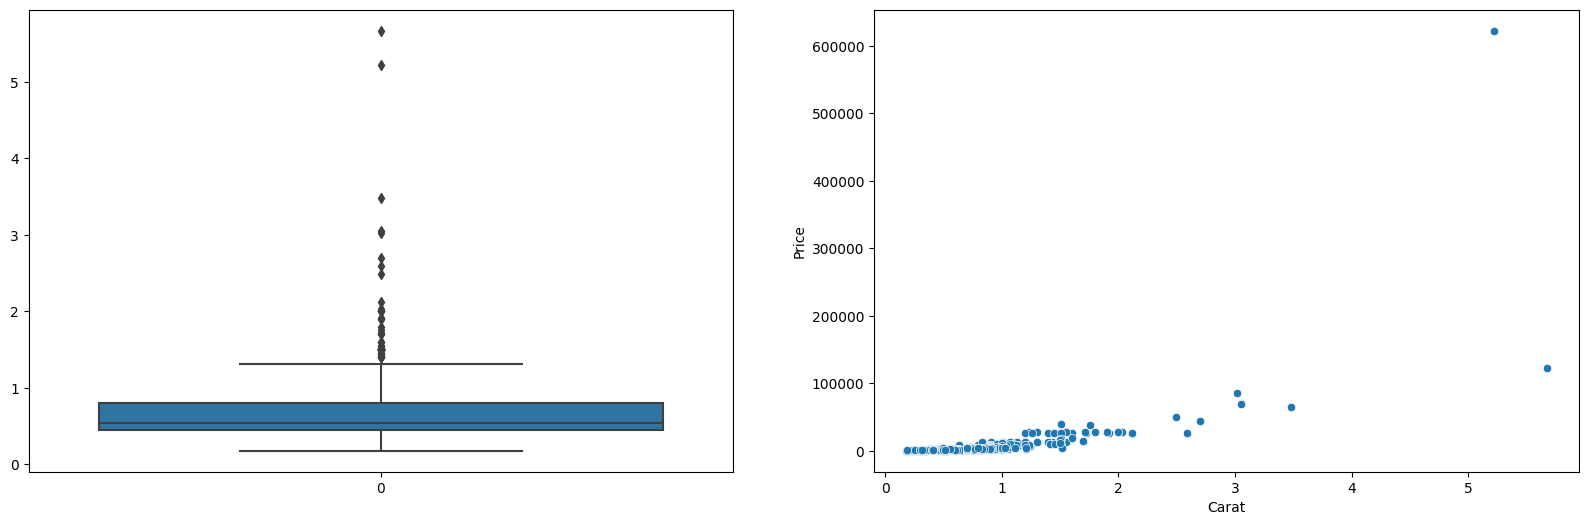

In [ ]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data['Carat'], ax=ax[0])
sns.scatterplot(data=data, x='Carat', y='Price', ax=ax[1])
plt.show()

* Các viên kim cương có carat chủ yếu từ 0.5 đến 0.8
* Carat là đặc trưng ảnh hưởng đến price
* Quan hệ giữa carat và price dường như là phi tuyến
* Các viên có cùng carat có mức giá khác khác nhau có thể còn phụ thuộc vào các yếu tố khác
* Các viên có carat từ 3.5 trở lên xuất hiện rất ít và đắt hơn một cách bất thường

In [ ]:
# drop các viên có Carat > 5
# data=data.drop(data[data['Carat'] >= 3.5].index)

In [ ]:
data=outlier_handling(data, 'Carat', mode='extreme', dist='skewed')

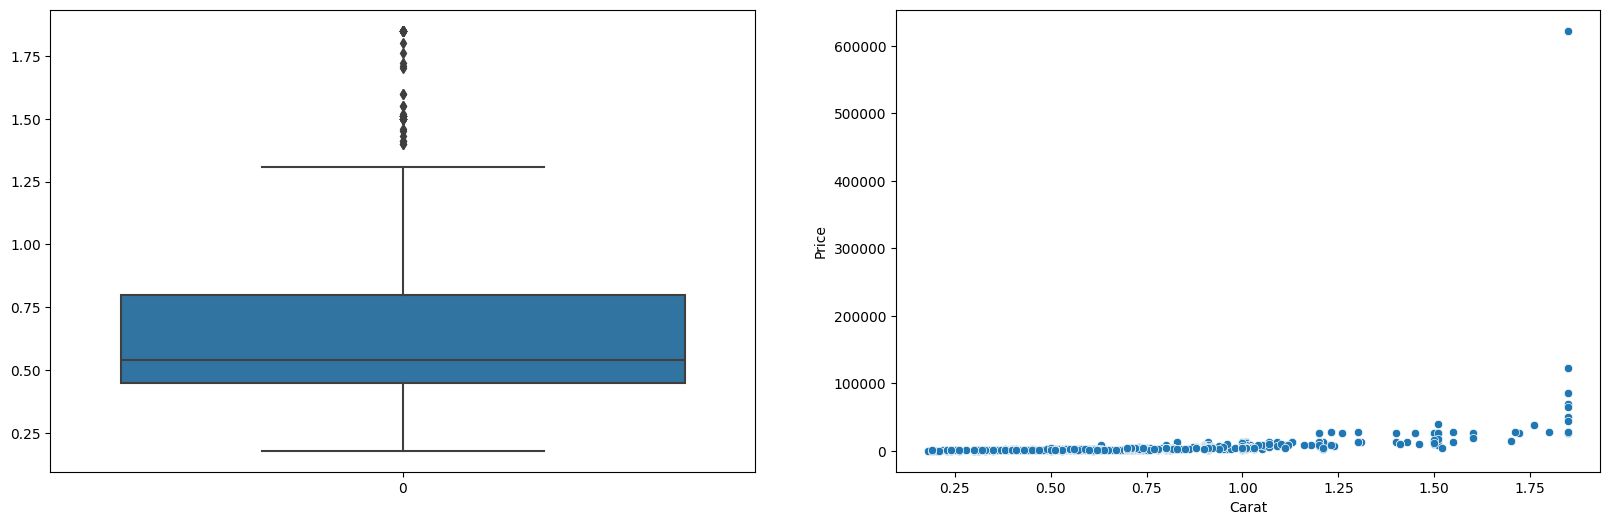

In [ ]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data['Carat'], ax=ax[0])
sns.scatterplot(data=data, x='Carat', y='Price', ax=ax[1])
plt.show()

**Thêm Log_Price**

In [ ]:
data['Log_Price'] = data.Price.apply(np.log)

<Axes: xlabel='Carat', ylabel='Log_Price'>

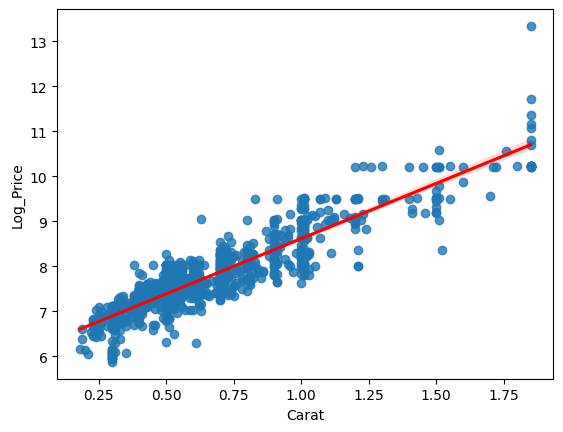

In [ ]:
sns.regplot(data=data, x='Carat', y='Log_Price', logx=False, line_kws={"color": "red"})

* Carat có tương quan khá tuyến tính với Log_Price

#### Price

Text(0.5, 0.98, 'Small data')

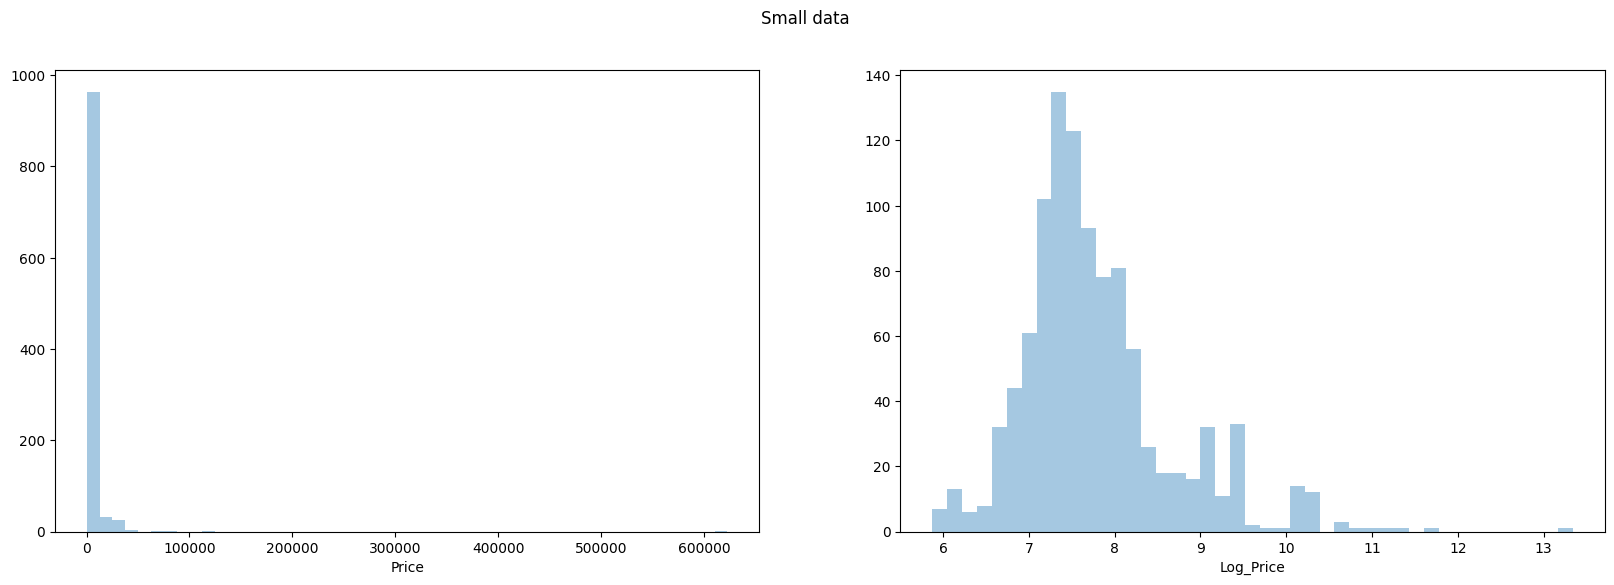

In [ ]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.distplot(data.Price, kde = False, ax=ax[0])
sns.distplot(data.Log_Price, kde = False, ax=ax[1])
figure.suptitle("Small data")

* Price có ngoại lệ khá nặng và nhiều ở phía bên phải
* Log_Price có phân bố chuẩn hơn so với Price, nhưng vẫn còn nhiều ngoại lệ cần được xử lí

In [ ]:
data['Price_Skew'] = data.Price
data.head()

,Shape,Carat,Color,Clarity,Cut,Fluorescence,%Depth,Table,Polish,Symmetry,Price,Length,Width,Depth,Log_Price,Price_Skew
0,Round,1.01,H,VVS2,Excellent_Ideal,Have_Fluorescence,61.2,61.0,Excellent_Ideal,Excellent,13537,6.43,6.47,3.95,9.513182,13537
1,Round,1.40,D,VS2,Excellent_Ideal,None,62.4,58.0,Excellent_Ideal,Excellent,27126,7.13,7.16,4.46,10.208248,27126
2,Round,1.85,K,VVS1,Excellent_Ideal,Have_Fluorescence,61.0,62.0,Excellent_Ideal,Excellent,27090,8.20,8.26,5.02,10.206920,27090
3,Round,0.30,I,I1_SI3,Excellent_Ideal,None,60.4,60.5,Excellent_Ideal,Excellent,435,4.31,4.34,2.61,6.075346,435
4,Round,0.56,G,VS2,Excellent_Ideal,Have_Fluorescence,62.2,57.0,Excellent_Ideal,Excellent,3075,5.23,5.27,3.26,8.031060,3075


Text(0.5, 0.98, 'Small data')

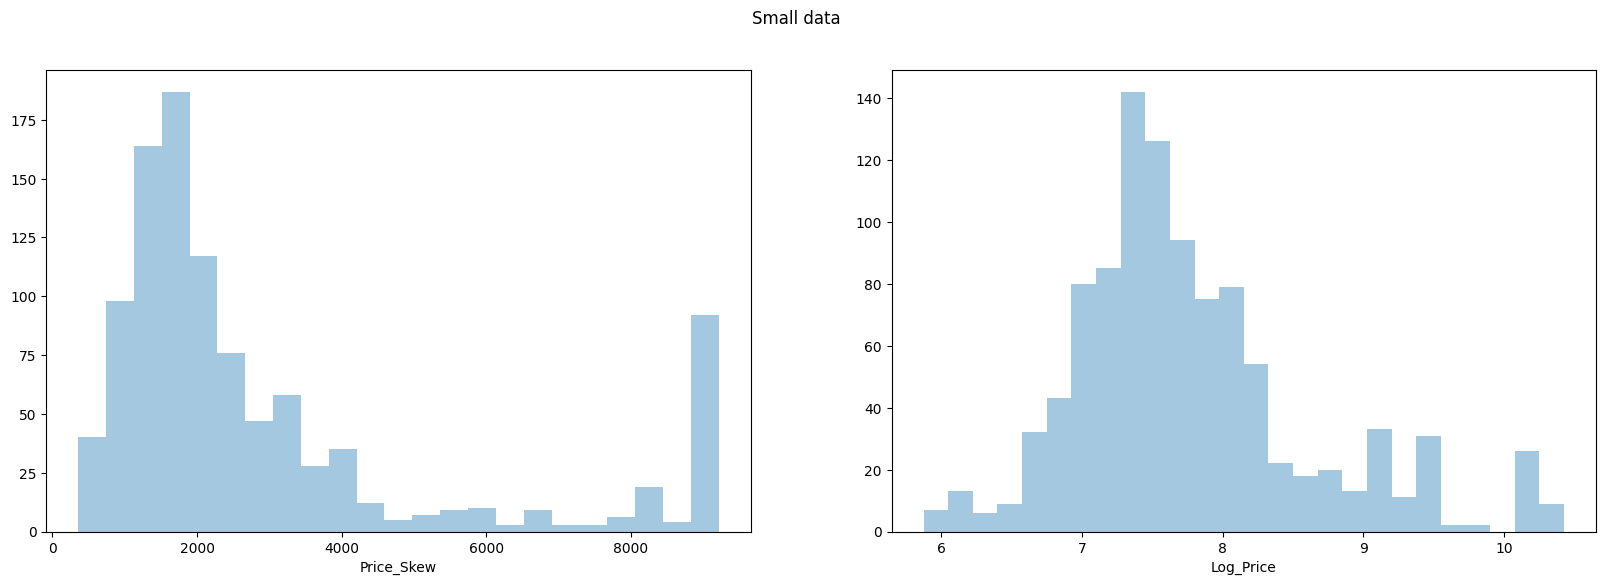

In [ ]:
data = outlier_handling(data, 'Log_Price', mode='extreme', dist='gaussian')
data = outlier_handling(data, 'Price_Skew', mode='extreme', dist='skewed')
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.distplot(data.Price_Skew, kde = False, ax=ax[0])
sns.distplot(data.Log_Price, kde = False, ax=ax[1])
figure.suptitle("Small data")

* Sau khi xử lí ngoại lệ thì phân bố của cả 2 đã ít ngoại lệ hơn trước nhưng nhìn chung Log_Price có phân bố tốt hơn Price

In [ ]:
data.drop('Price_Skew', axis=1, inplace=True)

#### %Depth & Price

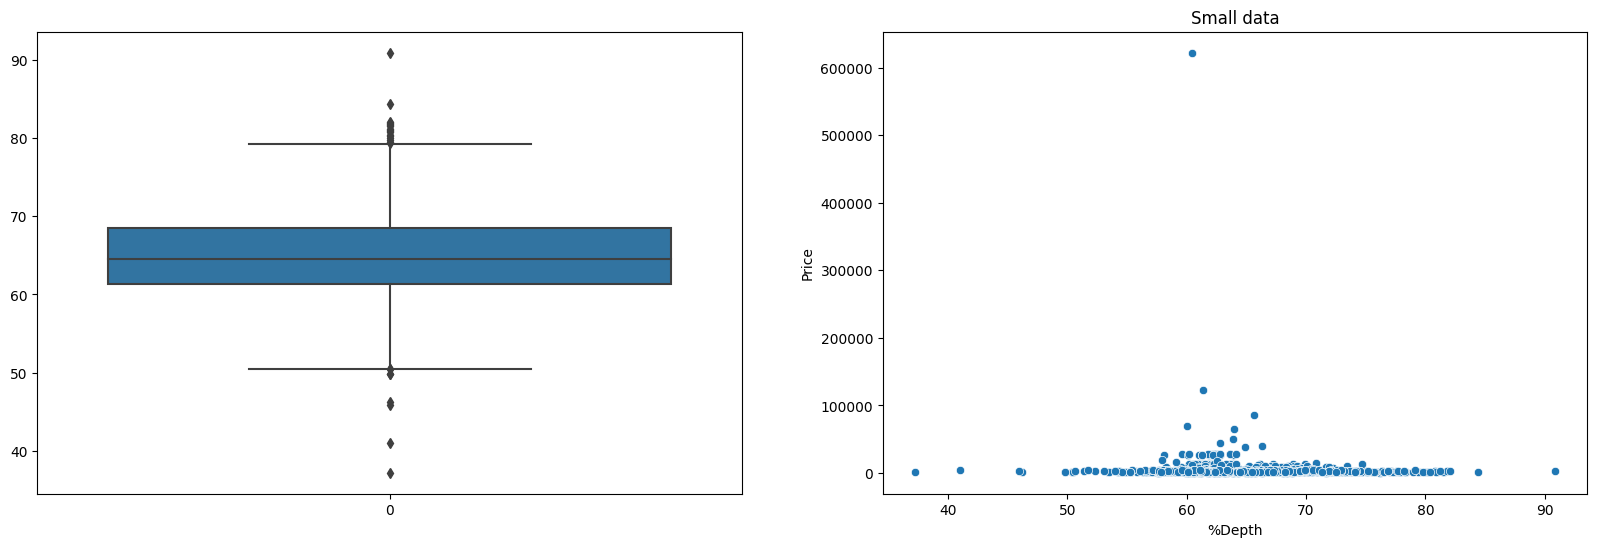

In [ ]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data['%Depth'], ax=ax[0])
sns.scatterplot(data=data, x='%Depth', y='Price', ax=ax[1])
plt.title('Small data')
plt.show()

* Ngoại lệ xuất hiện ở cả hai bên phân bố

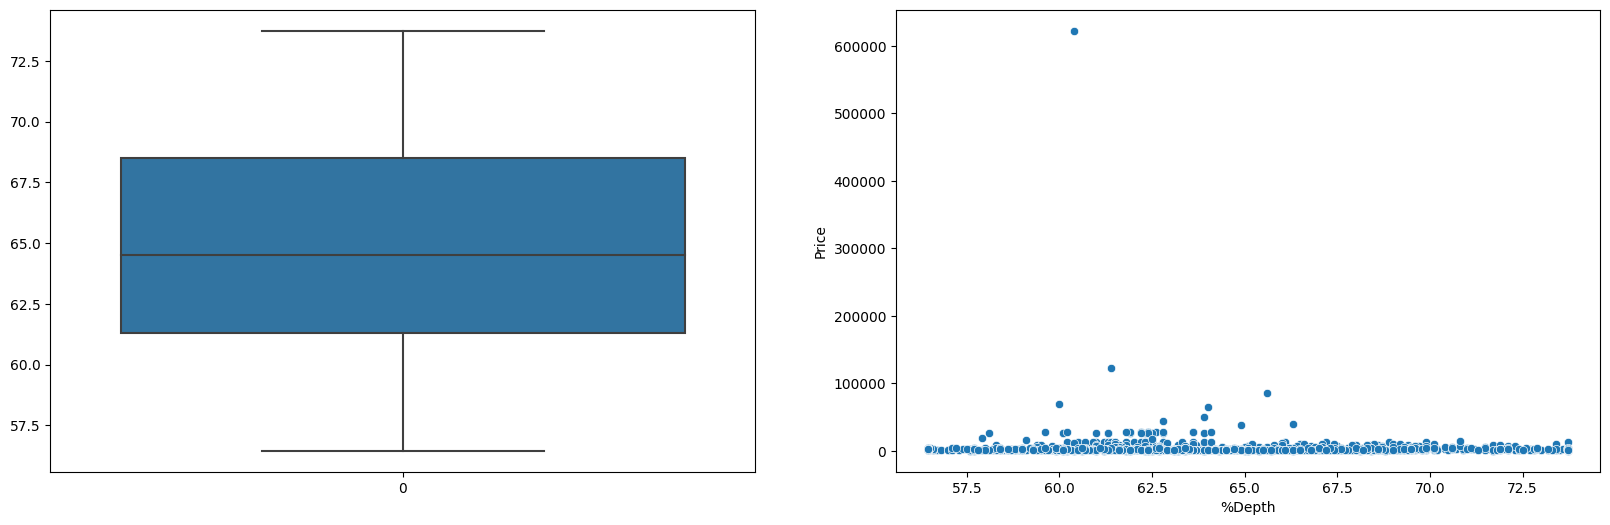

In [ ]:
# xử lí outlier
data = outlier_handling(data, '%Depth', dist='gaussian')
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data['%Depth'], ax=ax[0])
sns.scatterplot(data=data, x='%Depth', y='Price', ax=ax[1])
plt.show()

* Mối quan hệ giữa %Depth và Price không thể hiện rõ ràng lắm

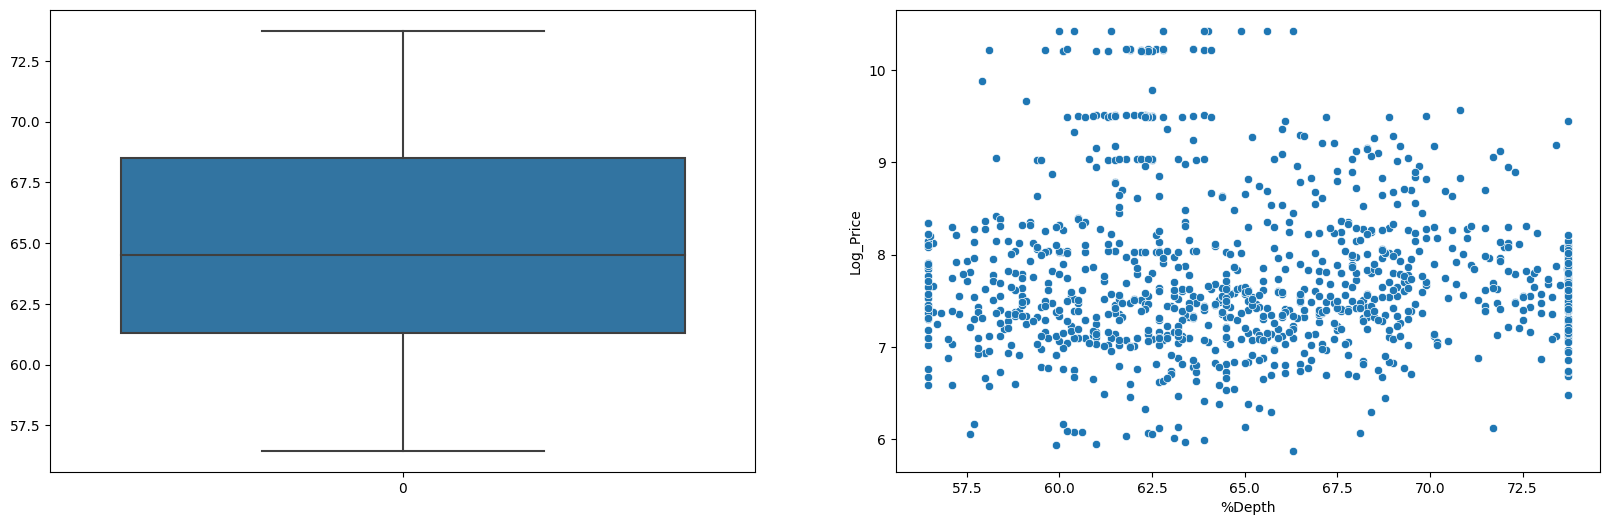

In [ ]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data['%Depth'], ax=ax[0])
sns.scatterplot(data=data, x='%Depth', y='Log_Price', ax=ax[1])
plt.show()

#### Table & Price

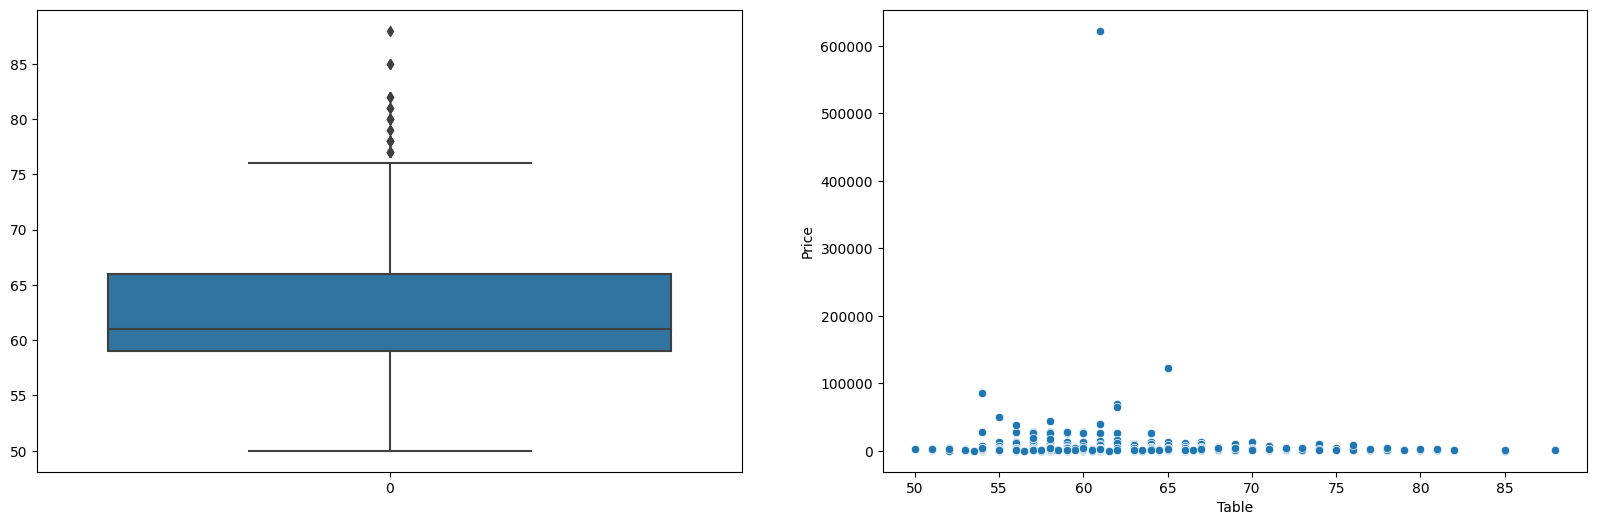

In [ ]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data['Table'], ax=ax[0])
sns.scatterplot(data=data, x='Table', y='Price', ax=ax[1])
plt.show()

* Table có phân bố hơi bị lệch phải

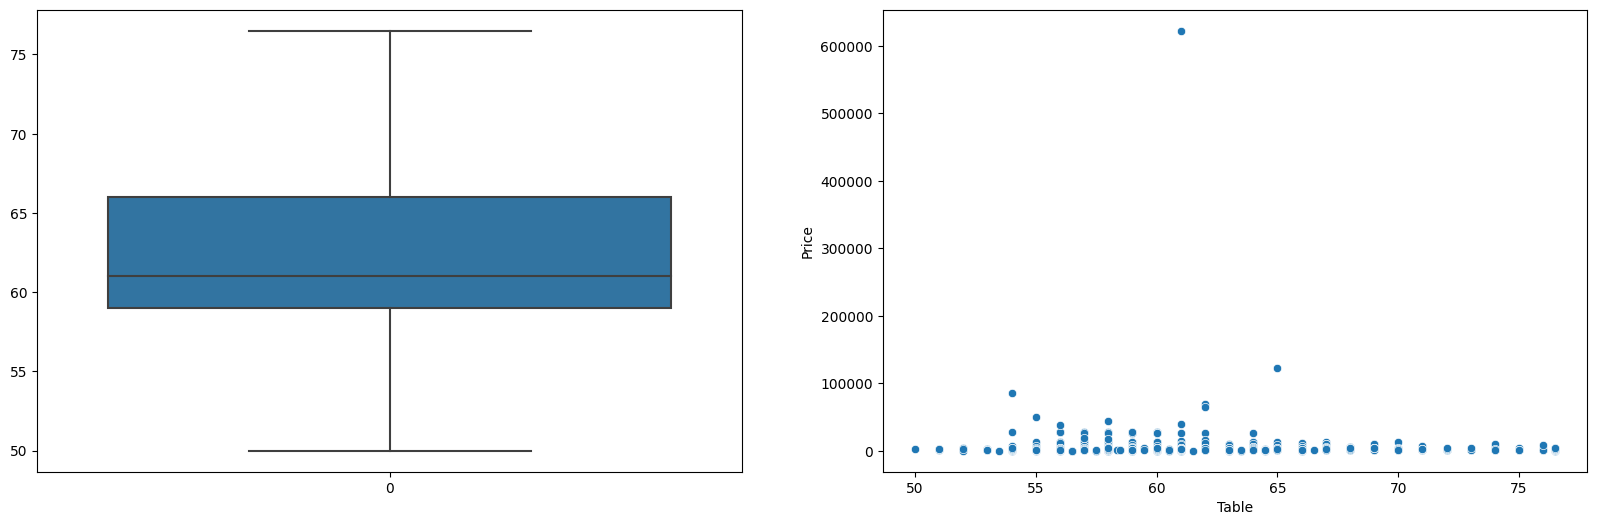

In [ ]:
# Xử lí outlier
data = outlier_handling(data, 'Table', dist='skewed')
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data['Table'], ax=ax[0])
sns.scatterplot(data=data, x='Table', y='Price', ax=ax[1])
plt.show()

* Tương quan với Price không rõ ràng lắm

#### Length, Width, Depth & Price

Text(0.5, 0.98, 'Small data')

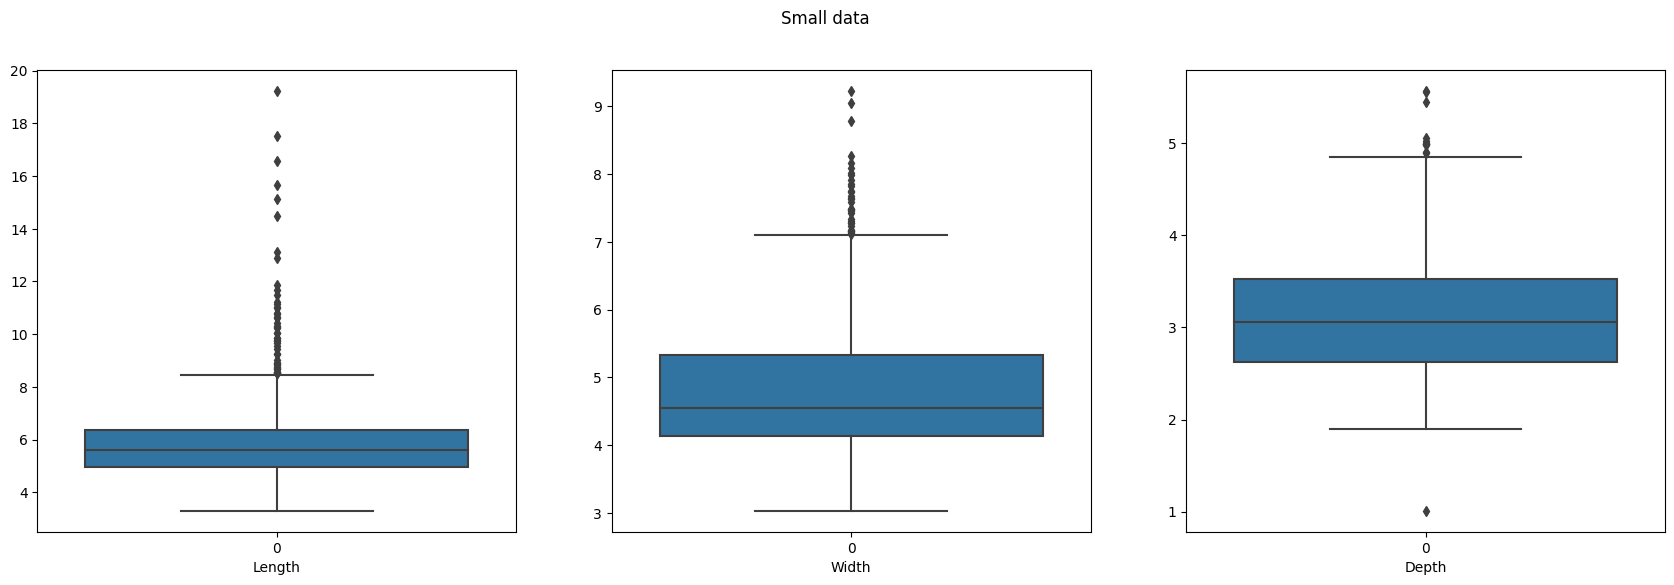

In [ ]:
figure, ax = plt.subplots(ncols=3, figsize=(21, 6))
sns.boxplot(data=data.Length, ax=ax[0])
ax[0].set_xlabel('Length')

sns.boxplot(data=data.Width, ax=ax[1])
ax[1].set_xlabel('Width')

sns.boxplot(data=data.Depth, ax=ax[2])
ax[2].set_xlabel('Depth')
figure.suptitle("Small data")

* Length, Width, Depth có khá nhiều ngoại lệ ở bên phải

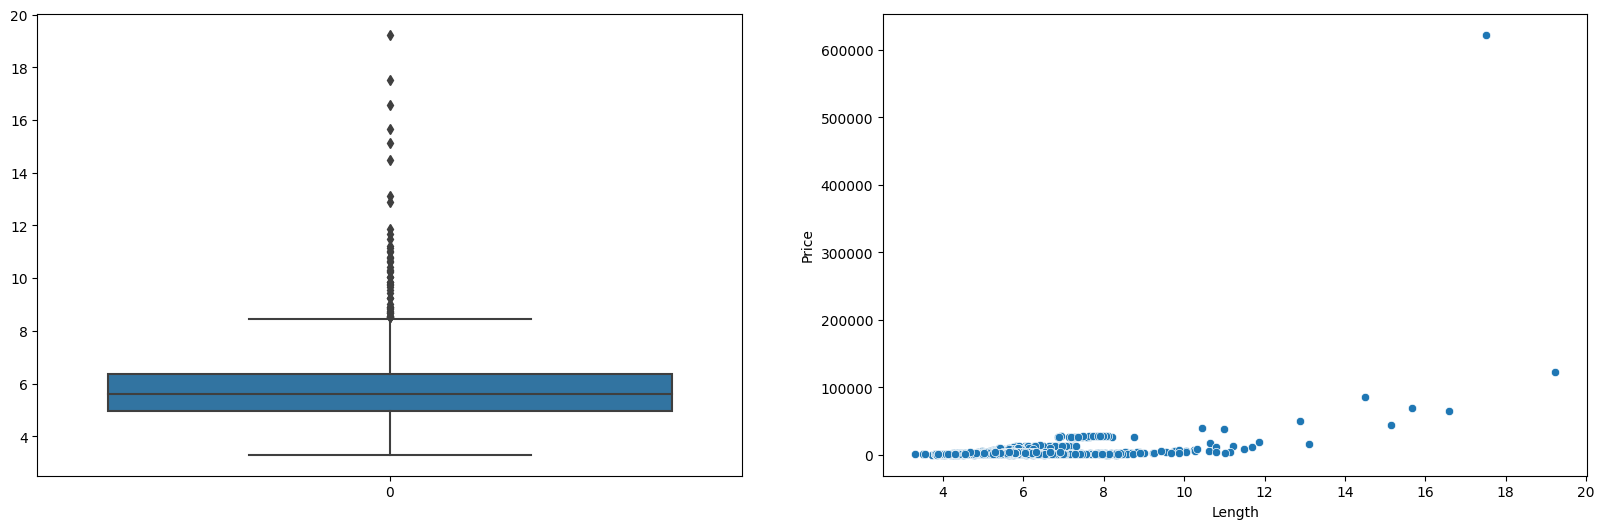

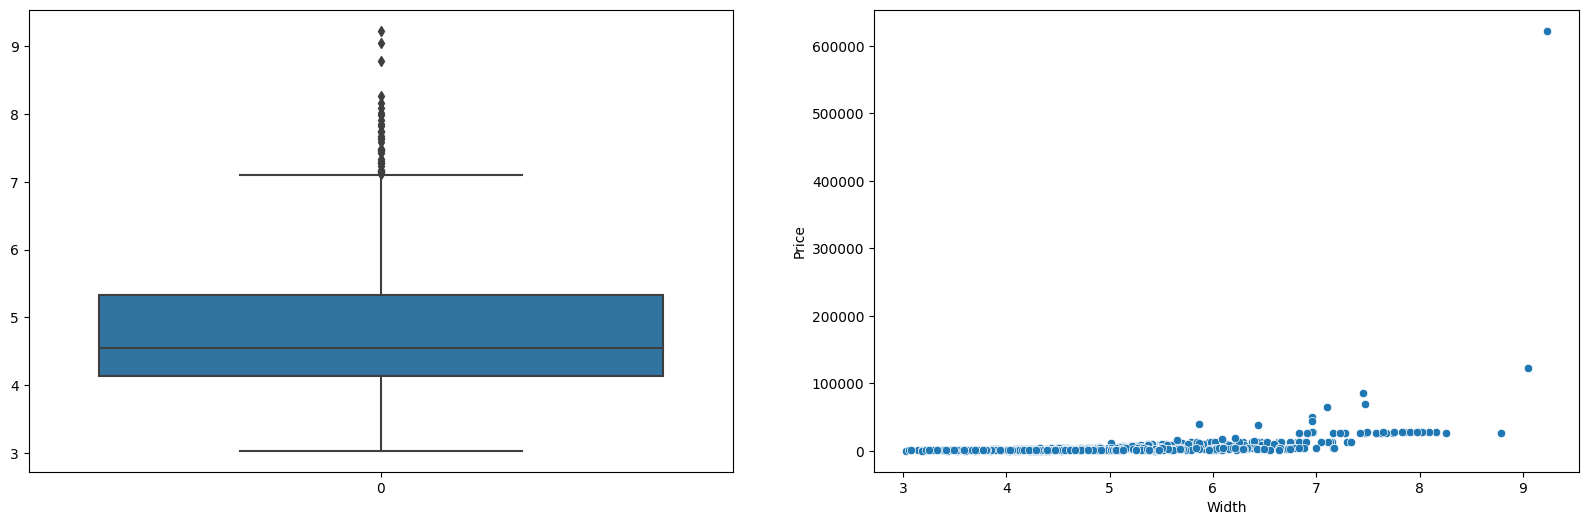

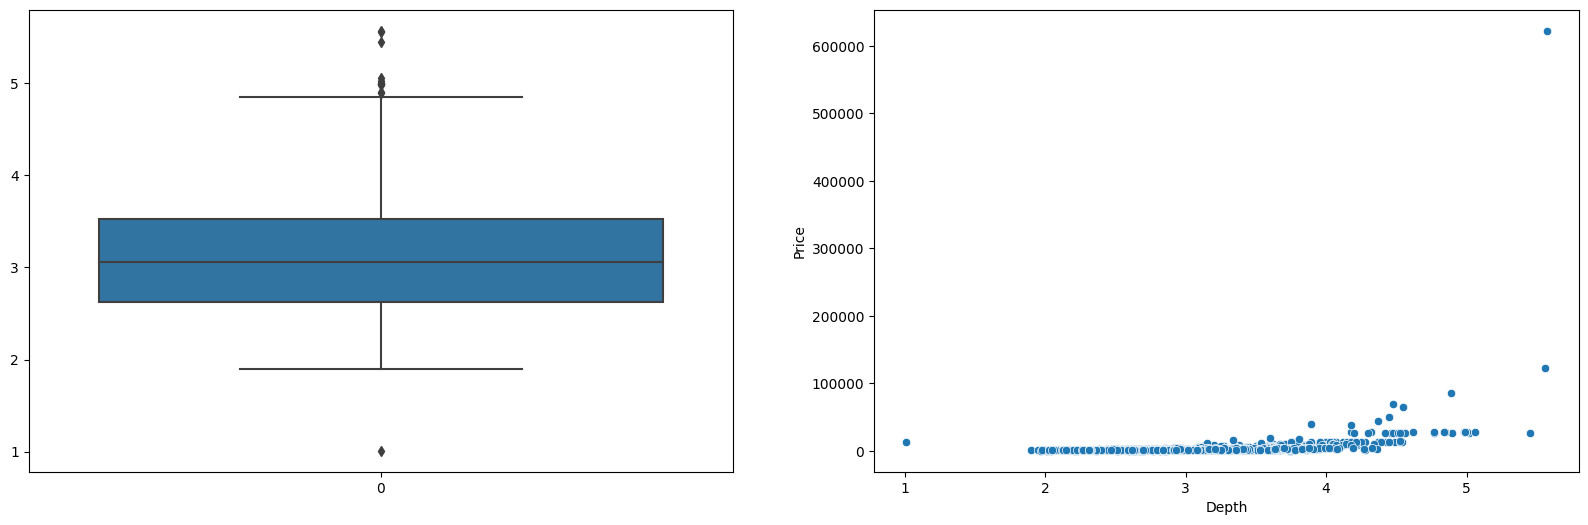

In [ ]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.Length, ax=ax[0])
sns.scatterplot(data=data, x='Length', y='Price', ax=ax[1])
plt.show()

figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.Width, ax=ax[0])
sns.scatterplot(data=data, x='Width', y='Price', ax=ax[1])
plt.show()

figure, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.boxplot(data=data.Depth, ax=ax[0])
sns.scatterplot(data=data, x='Depth', y='Price', ax=ax[1])

plt.show()

In [ ]:
# Xử lí outlier
data = data.drop(data[data['Length'] > 16].index)
data = data.drop(data[data['Width'] > 8.5].index)
data = data.drop(data[data['Depth'] > 5.5].index)
data = data.drop(data[data['Depth'] < 1.5].index)
data = outlier_handling(data, 'Length', mode='extreme', dist='gaussian')
data = outlier_handling(data, 'Width', mode='extreme', dist='skewed')
data = outlier_handling(data, 'Depth', dist='gaussian')

Text(0.5, 0.98, 'Small data')

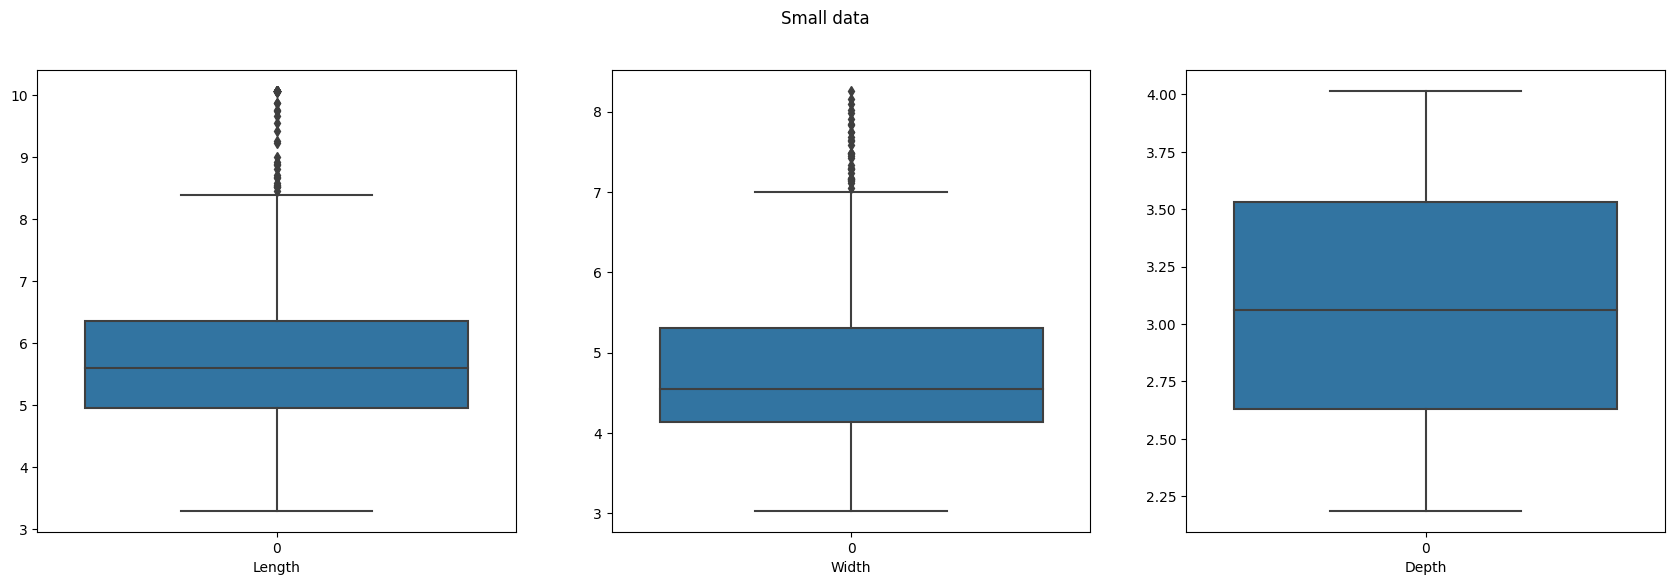

In [ ]:
figure, ax = plt.subplots(ncols=3, figsize=(21, 6))
sns.boxplot(data=data.Length, ax=ax[0])
ax[0].set_xlabel('Length')

sns.boxplot(data=data.Width, ax=ax[1])
ax[1].set_xlabel('Width')

sns.boxplot(data=data.Depth, ax=ax[2])
ax[2].set_xlabel('Depth')
figure.suptitle("Small data")

* Sau khi xử lí thì cả 3 đã ít ngoại lệ hơn

Text(0.5, 0.98, 'Small data')

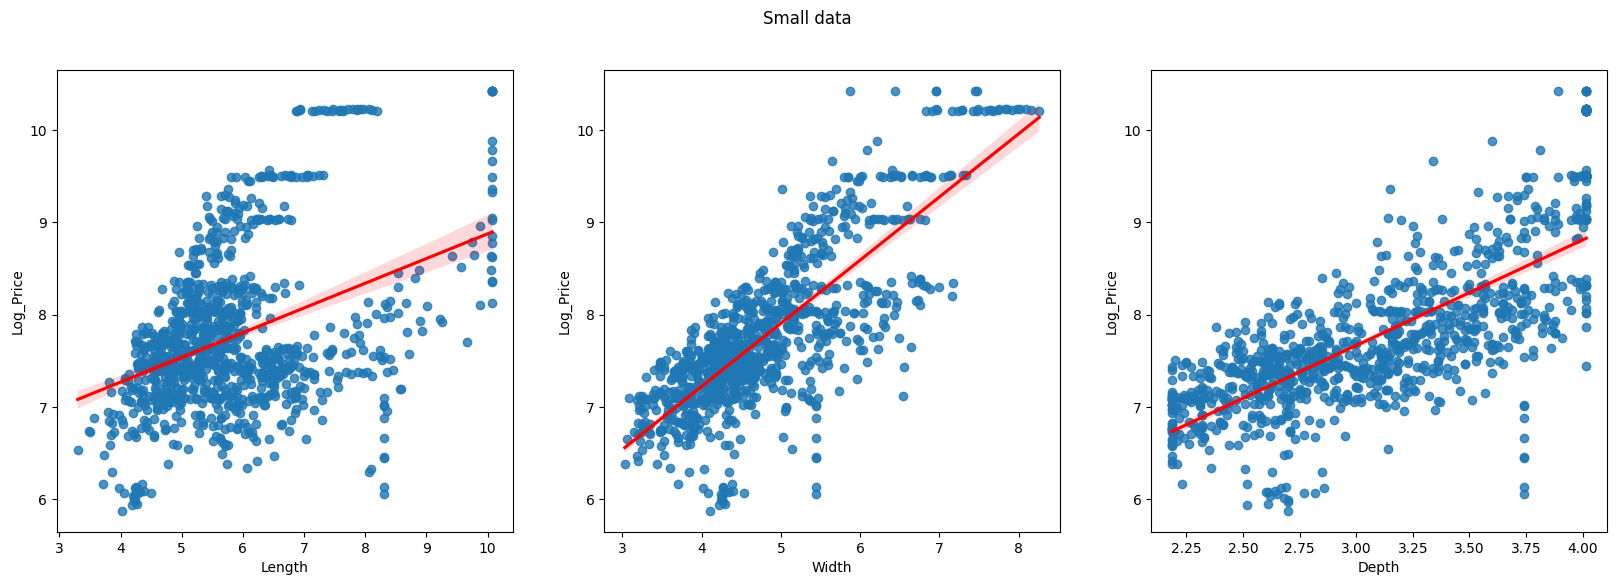

In [ ]:
# Plot with Log_Price
figure, ax = plt.subplots(ncols=3, figsize=(20, 6))
sns.regplot(data=data, x='Length', y='Log_Price', logx=False, line_kws={"color": "red"}, ax=ax[0])
sns.regplot(data=data, x='Width', y='Log_Price', logx=False, line_kws={"color": "red"}, ax=ax[1])
sns.regplot(data=data, x='Depth', y='Log_Price', logx=False, line_kws={"color": "red"}, ax=ax[2])
figure.suptitle("Small data")

* Width và Depth nhìn chung có tương quan tuyến tính với Log_Price
* Length có tương quan với Log_Price ít rõ ràng hơn so với Width và Depth

## Combine categoris & numerics

#### Shape, Carat, Price

**Gôp các loại Shape khác Round về loại tên là Fancy vì Round thường có giá cao hơn các loại này**

In [ ]:
data['Shape'] = data['Shape'].replace(['Princess', 'Cushion', 'Emerald', 'Asscher', 'Marquise', 'Oval',
                                       'Radiant', 'Pear', 'Heart'], 'Fancy')

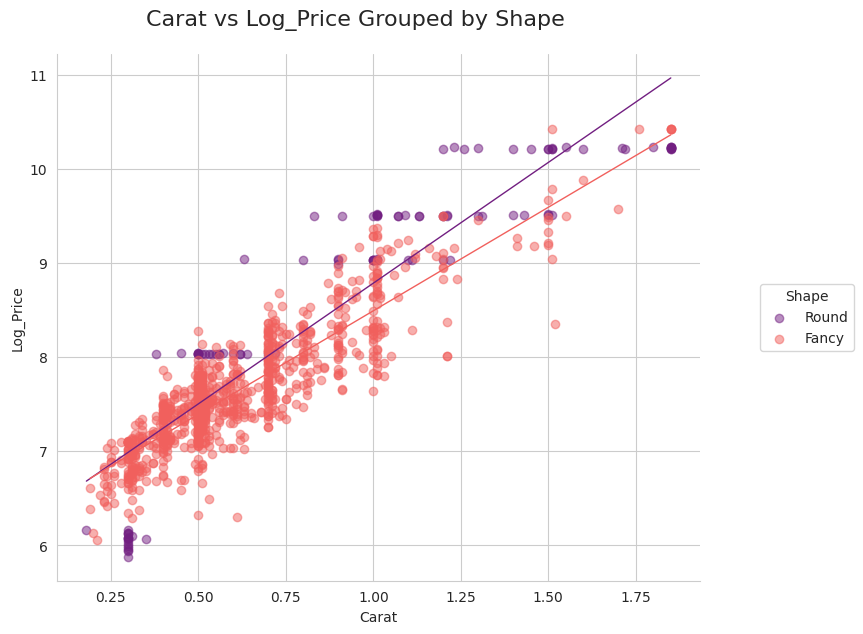

In [ ]:
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="Carat", y="Log_Price", hue="Shape", data=data, 
               palette="magma", scatter_kws={"alpha": 0.5}, legend=False, logx=False,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Carat vs Log_Price Grouped by Shape", y=1.05, fontsize=16)
g.set_axis_labels("Carat", "Log_Price")
g.ax.legend(title="Shape", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Round nhìn chung có giá cao hơn Fancy khi so với cùng Carat

#### Color, Carat, Price

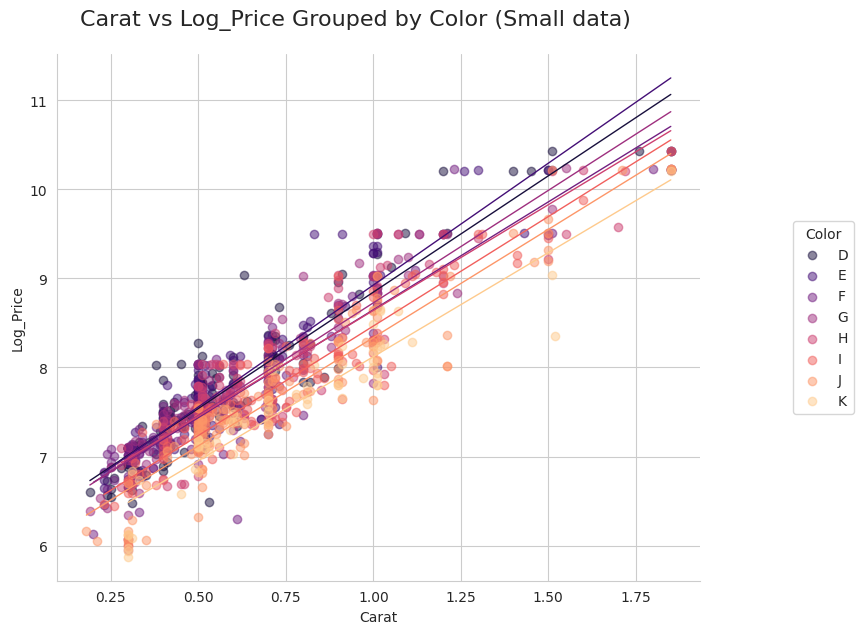

In [ ]:
color_dtype = pd.api.types.CategoricalDtype(
    categories=['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
    ordered=True)
data['Color'] = data['Color'].astype(color_dtype)

# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="Carat", y="Log_Price", hue="Color", data=data, 
               palette="magma", scatter_kws={"alpha": 0.5}, legend=False, logx=False,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Carat vs Log_Price Grouped by Color (Small data)", y=1.05, fontsize=16)
g.set_axis_labels("Carat", "Log_Price")
g.ax.legend(title="Color", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Các nhóm màu D, E, F đắt hơn các màu khác khi so với cùng Carat

#### Clarity, Carat, Price

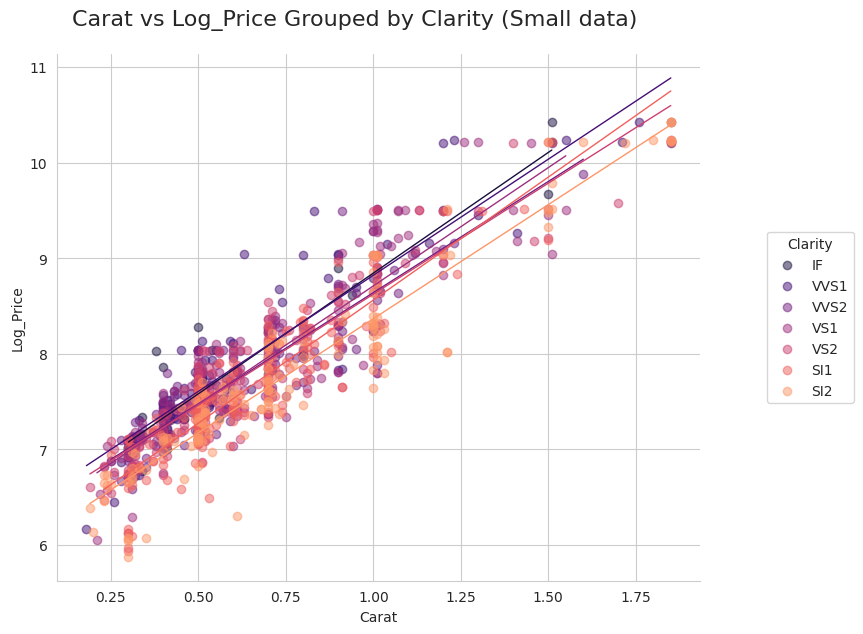

In [ ]:
clar_dtype = pd.api.types.CategoricalDtype(
    categories=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3_I1'], 
    ordered=True)
data['Clarity'] = data['Clarity'].astype(clar_dtype)

# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="Carat", y="Log_Price", hue="Clarity", data=data, 
               palette="magma", scatter_kws={"alpha": 0.5}, legend=False, logx=False,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Carat vs Log_Price Grouped by Clarity (Small data)", y=1.05, fontsize=16)
g.set_axis_labels("Carat", "Log_Price")
g.ax.legend(title="Clarity", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Clarity càng tốt thì càng đắt khi so với cùng Carat

#### Cut, Carat, Price

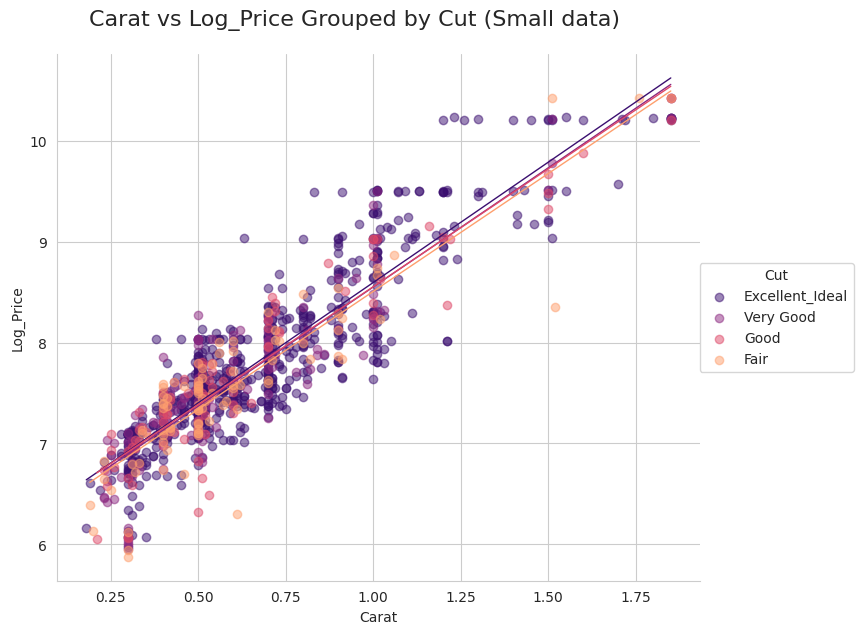

In [ ]:
cut_dtype = pd.api.types.CategoricalDtype(
    categories=['Excellent_Ideal', 'Very Good', 'Good', 'Fair'], 
    ordered=True)
data['Cut'] = data['Cut'].astype(cut_dtype)
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="Carat", y="Log_Price", hue="Cut", data=data, 
               palette="magma", scatter_kws={"alpha": 0.5}, legend=False, logx=False,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Carat vs Log_Price Grouped by Cut (Small data)", y=1.05, fontsize=16)
g.set_axis_labels("Carat", "Log_Price")
g.ax.legend(title="Cut", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Chất lượng Cut càng cao thì giá càng cao khi so cùng Carat

#### Fluorescence, Carat, Price

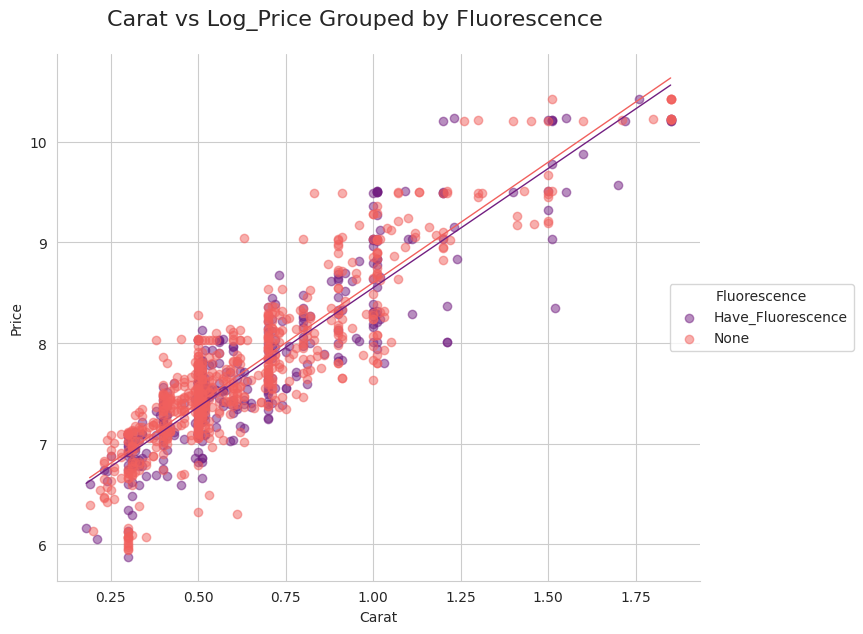

In [ ]:
# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="Carat", y="Log_Price", hue="Fluorescence", data=data, 
               palette="magma", scatter_kws={"alpha": 0.5}, legend=False, logx=False,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Carat vs Log_Price Grouped by Fluorescence", y=1.05, fontsize=16)
g.set_axis_labels("Carat", "Price")
g.ax.legend(title="Fluorescence", loc='center right', bbox_to_anchor=(1.25, 0.5))

* 'None' có giá cao hơn 'Have_Fluorescence' khi so cùng Carat

#### Polish, Carat, Price

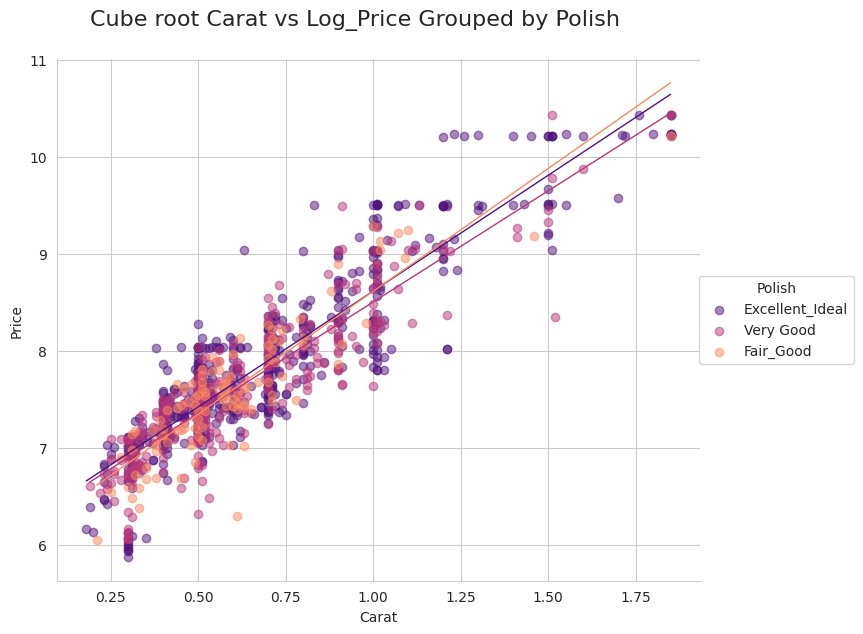

In [ ]:
Polish_dtype = pd.api.types.CategoricalDtype(
    categories=['Excellent_Ideal', 'Very Good', 'Fair_Good'], 
    ordered=True)
data['Polish'] = data['Polish'].astype(Polish_dtype)

# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="Carat", y="Log_Price", hue="Polish", data=data, 
               palette="magma", scatter_kws={"alpha": 0.5}, legend=False, logx=False,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Carat vs Log_Price Grouped by Polish", y=1.05, fontsize=16)
g.set_axis_labels("Carat", "Price")
g.ax.legend(title="Polish", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Các viên có Carat từ 0.13 -> 0.75 thì giá tăng dần theo chất lượng Polish
* Các viên có Carat từ 0.75 trở lên thì giá loại 'Fair_Good' lại cao hơn 'Very Good' và 'Excellent_Ideal'

#### Symmetry, Carat, Price

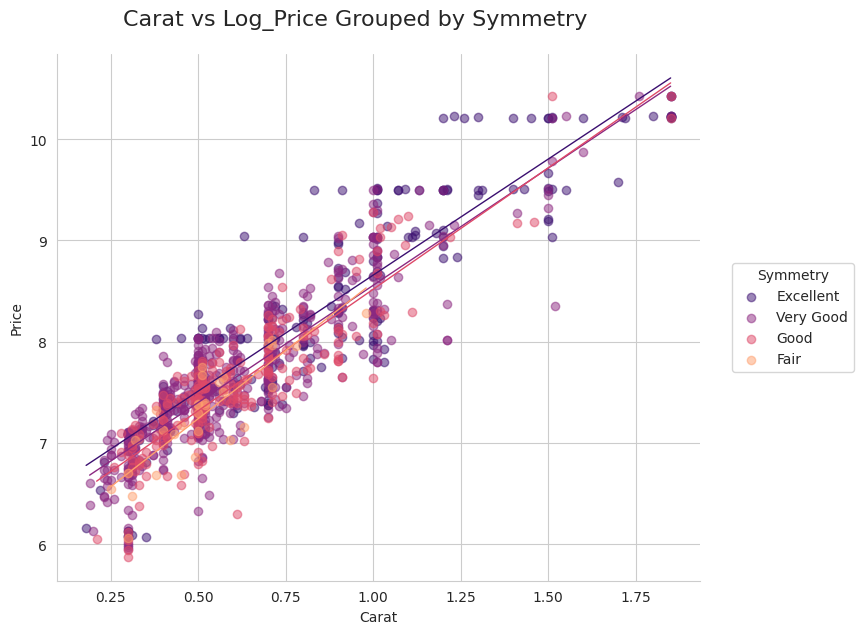

In [ ]:
Symmetry_dtype = pd.api.types.CategoricalDtype(
    categories=['Excellent', 'Very Good', 'Good', 'Fair'], 
    ordered=True)
data['Symmetry'] = data['Symmetry'].astype(Symmetry_dtype)

# lmplot
sns.set_style("whitegrid")
g = sns.lmplot(x="Carat", y="Log_Price", hue="Symmetry", data=data, 
               palette="magma", scatter_kws={"alpha": 0.5}, legend=False, logx=False,
               height=6, aspect=1.2, ci=None, scatter=True, line_kws={"linewidth":1})
g.fig.suptitle("Carat vs Log_Price Grouped by Symmetry", y=1.05, fontsize=16)
g.set_axis_labels("Carat", "Price")
g.ax.legend(title="Symmetry", loc='center right', bbox_to_anchor=(1.25, 0.5))

* Giá tăng dần theo chất lượng Symmetry khi so cùng Carat

# Feature Selection

Text(0.5, 1.0, 'Small data')

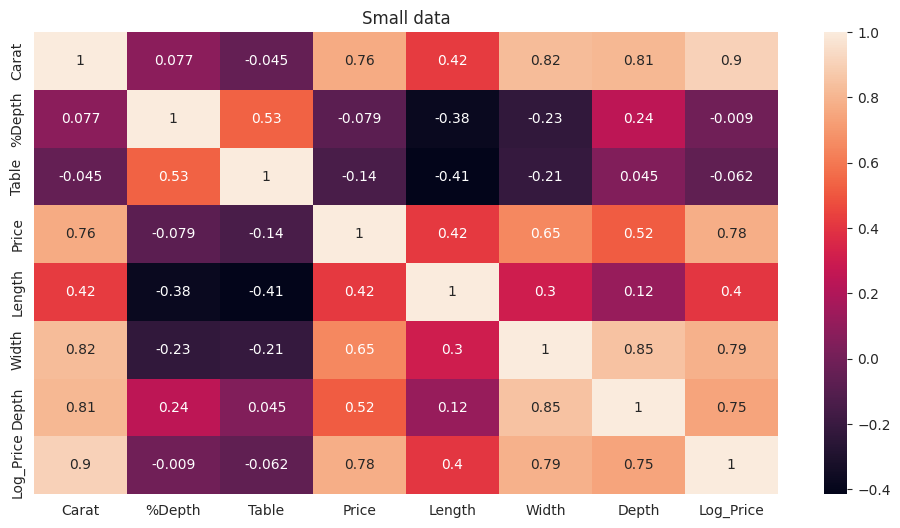

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Small data')

+ Từ bảng trên, ta thấy Log_Price có tương quan với các biến hầu như cao hơn so với Price
+ Carat có tương quan với Log_Price cao hơn Price (0.9 > 0.76)
+ Length có tương quan với Log_Price bằng với Price (0.4 < 0.42)
+ Width, Depth có tương quan với Log_Price cao hơn hẳn so với Price ((0.79, 0.75) & (0.65, 0.52))
+ %Depth và Table có tương quan thấp với Price và Log_Price ((-0.079, -0.14) & (-0.009, -0.062))
+ -> Loại %Depth và Table, chọn Carat, Length, Width, Depth, Log_Price cùng với Shape, Color, Clarity, Cut, Polish, Symmetry đưa vào model

In [ ]:
data.drop('%Depth', axis=1, inplace=True)
data.drop('Table', axis=1, inplace=True)
data.drop('Price', axis=1, inplace=True)

# Label Encoder

In [ ]:
data['Shape'] = data['Shape'].astype(str)
data['Color'] = data['Color'].astype(str)
data['Clarity'] = data['Clarity'].astype(str)
data['Cut'] = data['Cut'].astype(str)
data['Polish'] = data['Polish'].astype(str)
data['Symmetry'] = data['Symmetry'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_en = data.copy()
label_encoder = LabelEncoder()
object_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in object_cols:
    data_en[col] = label_encoder.fit_transform(data_en[col])

# data_en.to_csv('data_small_clean.csv', index=False)

# Feature Transform

In [ ]:
data_f = data_en.copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_f.drop('Log_Price', axis=1), data_f.Log_Price, test_size=0.2, random_state=42)

* Áp dụng Minmax Scaler cho các biến numerics:
    + Để các feature có vai trò đóng góp tương tự nhau, giảm sự ảnh hưởng quá lớn của một vài feature có thể gây ảnh hưởng đến việc dự đoán
    + Giữ nguyên độ tương quan giữa các giá trị sau khi scale

In [ ]:
from numpy.core import numeric
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_cols = ['Carat',
                'Length',
                'Width',
                'Depth']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

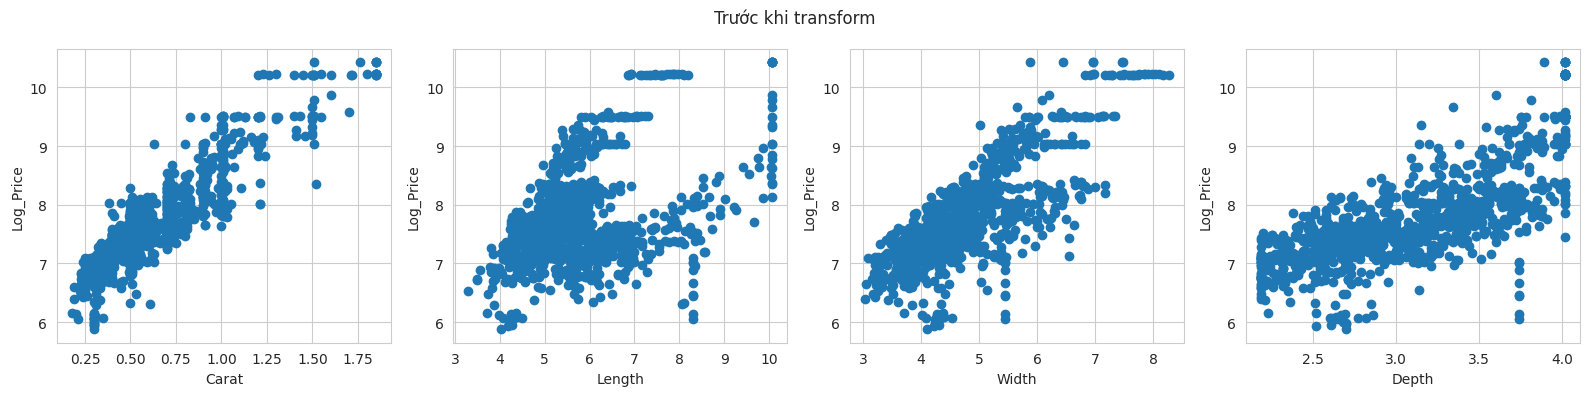

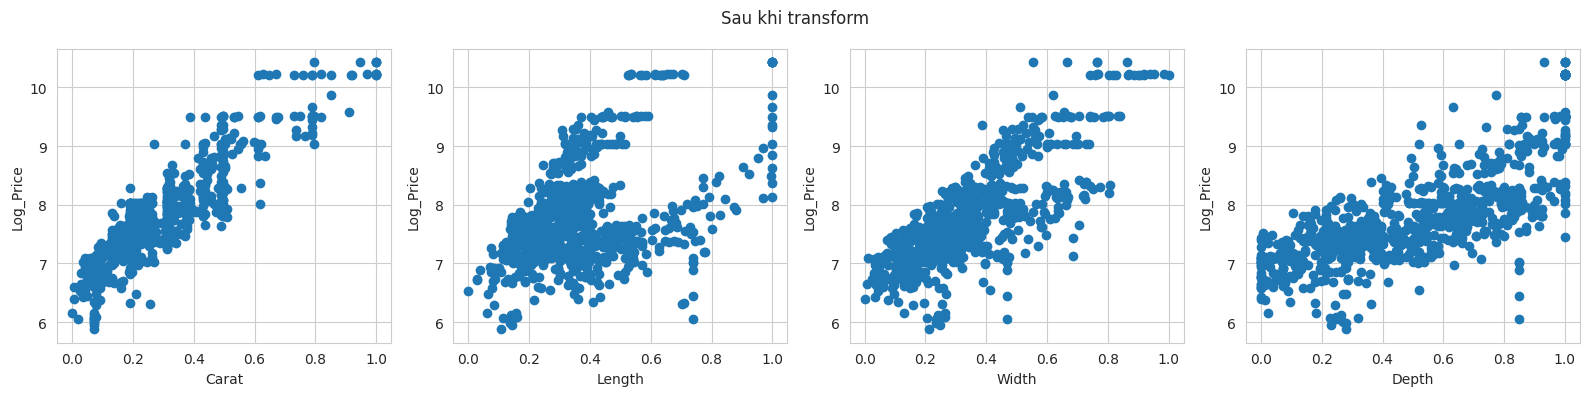

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, column in enumerate(numeric_cols):
    axs[i].scatter(data_en.drop('Log_Price', axis=1)[column], data_en.Log_Price, label=column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Log_Price')

fig.suptitle('Trước khi transform')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, column in enumerate(numeric_cols):
    axs[i].scatter(X_train[column], y_train, label=column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Log_Price')

fig.suptitle('Sau khi transform')
plt.tight_layout()
plt.show()

* Sau khi transform thì các feature đã được scale về khoảng (0,1)